In [ ]:
from google.colab import drive

drive.mount('/content/drive')

In [1]:
!pip install gdown

In [6]:
import gdown

# a file
url = " https://drive.google.com/file/d/1-09sgSnfWQk6C4-m5nxVD7dRrT2IjnZQ/view?usp=sharing"
output = "FruQ_MK2.zip"
gdown.download(url, output, fuzzy=True)

Downloading...
From (original): https://drive.google.com/uc?id=1-09sgSnfWQk6C4-m5nxVD7dRrT2IjnZQ
From (redirected): https://drive.google.com/uc?id=1-09sgSnfWQk6C4-m5nxVD7dRrT2IjnZQ&confirm=t&uuid=08fb90e2-fc19-474c-94d6-2c75da9d8913
To: /kaggle/working/FruQ_MK2.zip
100%|██████████| 4.58G/4.58G [00:33<00:00, 137MB/s] 


'FruQ_MK2.zip'

In [7]:
!unzip /kaggle/working/FruQ_MK2.zip

Archive:  /kaggle/working/FruQ_MK2.zip
   creating: content/FruQ-multi-new/content/FruQ-multi/
   creating: content/FruQ-multi-new/content/FruQ-multi/GrapefruitQ/
   creating: content/FruQ-multi-new/content/FruQ-multi/GrapefruitQ/Fresh/
  inflating: content/FruQ-multi-new/content/FruQ-multi/GrapefruitQ/Fresh/Image287.png  
  inflating: content/FruQ-multi-new/content/FruQ-multi/GrapefruitQ/Fresh/Image29.png  
  inflating: content/FruQ-multi-new/content/FruQ-multi/GrapefruitQ/Fresh/Image187.png  
  inflating: content/FruQ-multi-new/content/FruQ-multi/GrapefruitQ/Fresh/Image377.png  
  inflating: content/FruQ-multi-new/content/FruQ-multi/GrapefruitQ/Fresh/Image191.png  
  inflating: content/FruQ-multi-new/content/FruQ-multi/GrapefruitQ/Fresh/Image89.png  
  inflating: content/FruQ-multi-new/content/FruQ-multi/GrapefruitQ/Fresh/Image437.png  
  inflating: content/FruQ-multi-new/content/FruQ-multi/GrapefruitQ/Fresh/Image443.png  
  inflating: content/FruQ-multi-new/content/FruQ-multi/Grapef

In [12]:
import os

import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf

from PIL import Image

import seaborn as sns

from collections import Counter, defaultdict

import shutil

from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
import shutil



shutil.rmtree("/kaggle/working/content/FruQ-multi-new/content/FruQ-multi/PepperQ")

shutil.rmtree('/kaggle/working/content/FruQ-multi-new/content/FruQ-multi/WatermeloQ')

In [16]:
path = r'/kaggle/working/content/FruQ-multi-new/content/FruQ-multi'

In [17]:
original_dir = path



# Define the root directory for the new folder structure

new_dir = r'FruQ-new'

In [18]:
import random



def restructure_dataset(original_dir, new_dir, max_images_per_class=300):

    """

    Restructure dataset from nested folders to flat fruit_quality folders

    with a limit on the number of images per class.



    Args:

        original_dir: Source directory with nested fruit folders

        new_dir: Destination directory for restructured dataset

        max_images_per_class: Maximum number of images to keep per class

    """

    # Create the new root directory if it doesn't exist

    os.makedirs(new_dir, exist_ok=True)



    # Iterate through the original directory and reorganize the folders

    for fruit in os.listdir(original_dir):

        fruit_path = os.path.join(original_dir, fruit)



        if not os.path.isdir(fruit_path):

            continue



        # Iterate through the "Fresh", "Mild", "Rotten" subdirectories

        for quality in os.listdir(fruit_path):

            quality_path = os.path.join(fruit_path, quality)



            if not os.path.isdir(quality_path):

                continue



            # Define the new folder name (e.g., "Banana_Fresh")

            new_folder_name = f"{fruit}_{quality}"

            new_folder_path = os.path.join(new_dir, new_folder_name)



            # Create the new folder if it doesn't exist

            os.makedirs(new_folder_path, exist_ok=True)



            # Get all image files

            image_files = [f for f in os.listdir(quality_path)

                           if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]



            # Randomly select up to max_images_per_class

            selected_images = random.sample(image_files, min(len(image_files), max_images_per_class))



            # Copy selected images (instead of moving)

            for image_file in selected_images:

                old_image_path = os.path.join(quality_path, image_file)

                new_image_path = os.path.join(new_folder_path, image_file)



                # Use copy2 to preserve metadata

                shutil.copy2(old_image_path, new_image_path)



            print(f"Copied {len(selected_images)} images from {quality_path} to {new_folder_path}")



    print("Folder restructuring complete!")

In [19]:
restructure_dataset(path, new_dir)

Copied 136 images from /kaggle/working/content/FruQ-multi-new/content/FruQ-multi/PeachQ/Mild to FruQ-new/PeachQ_Mild
Copied 300 images from /kaggle/working/content/FruQ-multi-new/content/FruQ-multi/PeachQ/Rotten to FruQ-new/PeachQ_Rotten
Copied 300 images from /kaggle/working/content/FruQ-multi-new/content/FruQ-multi/PeachQ/Fresh to FruQ-new/PeachQ_Fresh
Copied 226 images from /kaggle/working/content/FruQ-multi-new/content/FruQ-multi/KakiQ/Mild to FruQ-new/KakiQ_Mild
Copied 300 images from /kaggle/working/content/FruQ-multi-new/content/FruQ-multi/KakiQ/Rotten to FruQ-new/KakiQ_Rotten
Copied 300 images from /kaggle/working/content/FruQ-multi-new/content/FruQ-multi/KakiQ/Fresh to FruQ-new/KakiQ_Fresh
Copied 300 images from /kaggle/working/content/FruQ-multi-new/content/FruQ-multi/AvocadoQ/Mild to FruQ-new/AvocadoQ_Mild
Copied 100 images from /kaggle/working/content/FruQ-multi-new/content/FruQ-multi/AvocadoQ/Rotten to FruQ-new/AvocadoQ_Rotten
Copied 300 images from /kaggle/working/content

# Create dataset

In [21]:
  from tensorflow.keras import layers

  from tensorflow.keras.applications.resnet50 import preprocess_input



  SEED = 123

  IMG_SIZE = 224

  def create_dataset(data_dir, img_size=(IMG_SIZE, IMG_SIZE), batch_size=8, buffer_size=1000):



    # Define data augmentation layer

    data_augmentation = tf.keras.Sequential([

        layers.RandomFlip("horizontal"),

        layers.RandomRotation(0.2),

        layers.RandomZoom(0.2),

        layers.RandomBrightness(0.2),

        layers.RandomTranslation(0.2, 0.2)

    ])





    # Create the dataset

    train_data = tf.keras.utils.image_dataset_from_directory(

        data_dir,

        labels='inferred',

        label_mode='categorical',

        class_names=None,

        color_mode='rgb',

        batch_size=batch_size,

        image_size=img_size,

        shuffle=True,

        seed=SEED,

        validation_split=0.2,

        subset='training',

        interpolation='bilinear'

    )

    class_names = train_data.class_names



    # Combine data augmentation and preprocessing

    augmented_train_dataset = train_data.map(

        lambda x, y: (preprocess_input(data_augmentation(x, training=True)), y)

    )



    # Configure the dataset for performance

    train_data_optimized = augmented_train_dataset.cache()\
      .shuffle(buffer_size)\
      .prefetch(buffer_size=tf.data.AUTOTUNE)



    val_data = tf.keras.utils.image_dataset_from_directory(

        data_dir,

        labels='inferred',

        label_mode='categorical',

        class_names=class_names,

        color_mode='rgb',

        batch_size=batch_size,

        image_size=img_size,

        shuffle=True,

        seed=SEED,

        validation_split=0.2,

        subset='validation',

        interpolation='bilinear'

    )



    # Apply preprocessing to validation data as well

    val_data = val_data.map(lambda x, y: (preprocess_input(x), y))



    return train_data, train_data_optimized, val_data, class_names, augmented_train_dataset

In [22]:
# Create train and validation datasets

train_data, train_data_optimized, val_data, class_names, augmented_train_dataset = create_dataset(new_dir)

print(f"Images of train dataset have shape: {train_data.element_spec[0].shape}")

print(f"Labels of train dataset have shape: {train_data_optimized.element_spec[1].shape}")

print(f"Images of validation dataset have shape: {val_data.element_spec[0].shape}")

print(f"Labels of validation dataset have shape: {val_data.element_spec[1].shape}")

print(f"Class names are: {class_names}")

Found 5792 files belonging to 24 classes.
Using 4634 files for training.
Found 5792 files belonging to 24 classes.
Using 1158 files for validation.
Images of train dataset have shape: (None, 224, 224, 3)
Labels of train dataset have shape: (None, 24)
Images of validation dataset have shape: (None, 224, 224, 3)
Labels of validation dataset have shape: (None, 24)
Class names are: ['AvocadoQ_Fresh', 'AvocadoQ_Mild', 'AvocadoQ_Rotten', 'BananaDB_Fresh', 'BananaDB_Mild', 'BananaDB_Rotten', 'CucumberQ_Fresh', 'CucumberQ_Mild', 'CucumberQ_Rotten', 'GrapefruitQ_Fresh', 'GrapefruitQ_Mild', 'GrapefruitQ_Rotten', 'KakiQ_Fresh', 'KakiQ_Mild', 'KakiQ_Rotten', 'PapayaQ_Fresh', 'PapayaQ_Mild', 'PapayaQ_Rotten', 'PeachQ_Fresh', 'PeachQ_Mild', 'PeachQ_Rotten', 'tomatoQ_Fresh', 'tomatoQ_Mild', 'tomatoQ_Rotten']


In [38]:
from sklearn.utils.class_weight import compute_class_weight



y_train = np.concatenate([y.numpy() for _, y in train_data])

# Convert one-hot encoded labels back to class indices

y_train_classes = np.argmax(y_train, axis=1)



# Compute class weights

classes = np.unique(y_train_classes)

class_weights = compute_class_weight('balanced', classes=classes, y=y_train_classes)



# Convert to dictionary for TensorFlow

class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}



print(class_weight_dict)


{0: 0.7913251366120219, 1: 0.7945816186556928, 2: 2.326305220883534, 3: 1.3408564814814814, 4: 2.4440928270042193, 5: 0.7512970168612192, 6: 0.9654166666666667, 7: 0.8112745098039216, 8: 2.298611111111111, 9: 1.0667587476979743, 10: 1.253787878787879, 11: 0.8939043209876543, 12: 0.7785618279569892, 13: 1.0667587476979743, 14: 0.8181497175141242, 15: 1.8929738562091503, 16: 0.9464869281045751, 17: 0.8468567251461988, 18: 0.7880952380952381, 19: 1.7714067278287462, 20: 0.7754350736278447, 21: 0.7880952380952381, 22: 0.8286838340486409, 23: 0.8358585858585859}


# 3. Model Creation

In [28]:
# def se_block(input_tensor, reduction_ratio=16):

#     """

#     Squeeze and Excitation block

#     """

#     channels = input_tensor.shape[-1]



#     # Squeeze operation (global average pooling)

#     x = layers.GlobalAveragePooling2D()(input_tensor)



#     # Excitation operation (two FC layers)

#     x = layers.Dense(channels // reduction_ratio, activation='relu')(x)

#     x = layers.BatchNormalization()(x)

#     x = layers.Dense(channels, activation='sigmoid')(x)



#     # Reshape to broadcasting shape

#     x = layers.Reshape((1, 1, channels))(x)



#     # Scale the input

#     return layers.multiply([input_tensor, x])

In [69]:
from tensorflow.keras.models import Model



def create_model(num_classes):

    base_model = tf.keras.applications.ResNet50(

        weights='imagenet',

        include_top=False,

        input_shape=(IMG_SIZE, IMG_SIZE, 3)

    )



    # Freeze base model

    base_model.trainable = False



    inputs = base_model.input

    x = base_model(inputs, training=False)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)

    x = tf.keras.layers.Dropout(0.5)(x)

    x = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)

    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)





    # Create model

    model = Model(inputs=inputs, outputs=outputs, name='fruit_classifier')



    return model


# 4. Model Compilation

In [70]:
def compile_model(model):

    model.compile(

        optimizer = tf.keras.optimizers.Adam(

        learning_rate=0.001

    ),

        loss='categorical_crossentropy',

        metrics=['accuracy']

    )




# 5. Callbacks


In [36]:
import datetime



# Create log directory with timestamp

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")


In [48]:
def create_callbacks():

    return [

        tf.keras.callbacks.EarlyStopping(

            monitor='val_loss',

            patience=10,

            restore_best_weights=True,

            min_delta=0.001

        ),

        tf.keras.callbacks.ModelCheckpoint(

            filepath=os.path.join(log_dir, 'model-{epoch:02d}-{val_accuracy:.2f}.keras'),

            monitor='val_accuracy',

            save_best_only=True,

            mode='max',

        ),

        tf.keras.callbacks.ReduceLROnPlateau(

            monitor='val_loss',

            factor=0.2,

            patience=5,

            min_lr=1e-6

        )

    ]




# 6. Training History Plotting


In [24]:
def plot_training_history(history, title):

    plt.figure(figsize=(12, 4))



    # Plot accuracy

    plt.subplot(1, 2, 1)

    plt.plot(history.history['accuracy'])

    plt.plot(history.history['val_accuracy'])

    plt.title(f'{title} - Accuracy')

    plt.ylabel('Accuracy')

    plt.xlabel('Epoch')

    plt.legend(['Train', 'Validation'])



    # Plot loss

    plt.subplot(1, 2, 2)

    plt.plot(history.history['loss'])

    plt.plot(history.history['val_loss'])

    plt.title(f'{title} - Loss')

    plt.ylabel('Loss')

    plt.xlabel('Epoch')

    plt.legend(['Train', 'Validation'])



    plt.tight_layout()

    plt.show()




# 7. Metric


In [25]:
def metric(model, dataset, class_names, title="Confusion Matrix"):

    # Get true labels and predictions

    y_true = []

    y_pred = []



    for images, labels in dataset:

        # Append true labels

        y_true.extend(np.argmax(labels.numpy(), axis=1))



        # Predict on images

        predictions = model.predict(images)

        y_pred.extend(np.argmax(predictions, axis=1))



    y_true = np.array(y_true)

    y_pred = np.array(y_pred)



    # Create confusion matrix

    cm = confusion_matrix(y_true, y_pred)



    # Plot confusion matrix

    plt.figure(figsize=(12, 8))

    plt.subplot(1, 2, 1)

    sns.heatmap(

        cm,

        annot=True,

        fmt='d',

        cmap='Blues',

        xticklabels=class_names,

        yticklabels=class_names

    )

    plt.title(f"{title}\nConfusion Matrix")

    plt.ylabel('True Label')

    plt.xlabel('Predicted Label')



    # Generate classification report

    report = classification_report(

        y_true,

        y_pred,

        target_names=class_names,

        output_dict=True

    )



    # Create metrics visualization

    plt.subplot(1, 2, 2)

    metrics_data = {

        'Precision': [],

        'Recall': [],

        'F1-Score': []

    }



    # Get metrics for each class

    for class_name in class_names:

        metrics_data['Precision'].append(report[class_name]['precision'])

        metrics_data['Recall'].append(report[class_name]['recall'])

        metrics_data['F1-Score'].append(report[class_name]['f1-score'])



    # Add macro average

    metrics_data['Precision'].append(report['macro avg']['precision'])

    metrics_data['Recall'].append(report['macro avg']['recall'])

    metrics_data['F1-Score'].append(report['macro avg']['f1-score'])



    # Create labels for all classes plus macro average

    all_labels = class_names + ['Macro Avg']

    x = np.arange(len(all_labels))

    width = 0.25



    # Plot bars for each metric

    plt.bar(x - width, metrics_data['Precision'], width, label='Precision')

    plt.bar(x, metrics_data['Recall'], width, label='Recall')

    plt.bar(x + width, metrics_data['F1-Score'], width, label='F1-Score')



    plt.xlabel('Classes')

    plt.ylabel('Score')

    plt.title(f'{title}\nPrecision, Recall, and F1-Score')

    plt.xticks(x, all_labels, rotation=45)

    plt.legend()

    plt.tight_layout()

    plt.show()



    # Print detailed classification report

    print("\nDetailed Classification Report:")

    print("\nPer-Class Metrics:")

    print("-" * 60)

    for class_name in class_names:

        print(f"\n{class_name}:")

        print(f"Precision: {report[class_name]['precision']:.3f}")

        print(f"Recall: {report[class_name]['recall']:.3f}")

        print(f"F1-Score: {report[class_name]['f1-score']:.3f}")



    print("\nMacro-Averaged Metrics:")

    print("-" * 60)

    print(f"Macro Precision: {report['macro avg']['precision']:.3f}")

    print(f"Macro Recall: {report['macro avg']['recall']:.3f}")

    print(f"Macro F1-Score: {report['macro avg']['f1-score']:.3f}")



    # Print support (number of samples per class)

    print("\nClass Support (Number of Samples):")

    print("-" * 60)

    for class_name in class_names:

        print(f"{class_name}: {report[class_name]['support']}")

In [26]:
def evaluate_models(model, val):

  classes = class_names

  metric(

      model,

      val,

      classes,

      f"{type} Classification Confusion Matrix"

  )

# 8. Model Training Function

In [71]:
fruit_model = create_model(

        num_classes=len(class_names)

    )



compile_model(fruit_model)

In [72]:
fruit_model.summary()

Model: "fruit_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │           3,096 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,853,080 (90.99 MB)

 Trainable params: 265,368 (1.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [74]:
history = fruit_model.fit(train_data_optimized,

                    epochs=50,

                    validation_data=val_data,

                    callbacks=create_callbacks(),

                    class_weight=class_weight_dict

                    )

Epoch 1/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 245s 118ms/step - accuracy: 0.7193 - loss: 2.5682 - val_accuracy: 0.8048 - val_loss: 1.0825 - learning_rate: 0.0010
Epoch 2/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 48s 82ms/step - accuracy: 0.8963 - loss: 0.7771 - val_accuracy: 0.9413 - val_loss: 0.6260 - learning_rate: 0.0010
Epoch 3/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 93s 101ms/step - accuracy: 0.9077 - loss: 0.6505 - val_accuracy: 0.9085 - val_loss: 0.4934 - learning_rate: 0.0010
Epoch 4/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 68s 77ms/step - accuracy: 0.9040 - loss: 0.5264 - val_accuracy: 0.9326 - val_loss: 0.4422 - learning_rate: 0.0010
Epoch 5/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 97s 102ms/step - accuracy: 0.9106 - loss: 0.5256 - val_accuracy: 0.9465 - val_loss: 0.4394 - learning_rate: 0.0010
Epoch 6/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 45s 78ms/step - accuracy: 0.9090 - loss: 0.5217 - val_accuracy: 0.9663 - val_loss: 0.3651 - learning_rate: 0.0010
Epoch 7/50
580/580 ━━━━━━━━━━━━━━━━━━━━ 95s 101ms/step - accuracy: 0.914

In [75]:
fruit_model.save('fruit_classifier_final.keras')

In [76]:
fruit_model.save('fruit_classifier_final.h5')

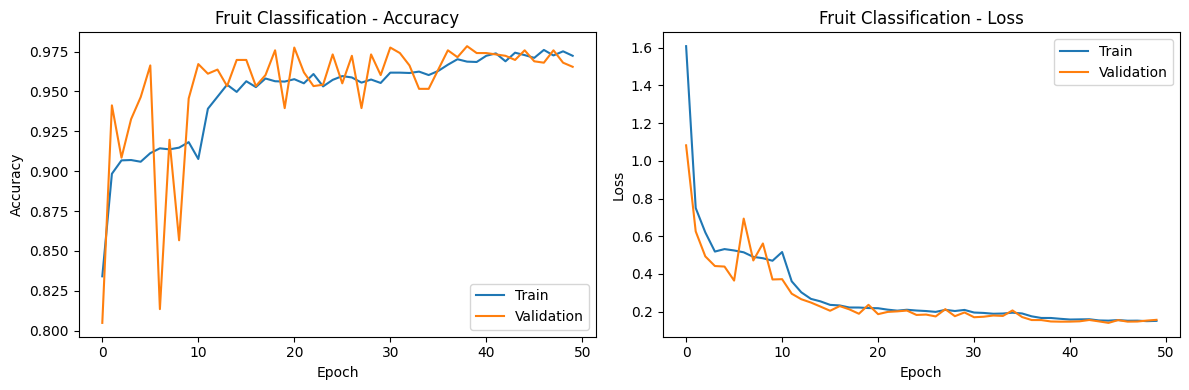

In [81]:
plot_training_history(history, "Fruit Classification")

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step

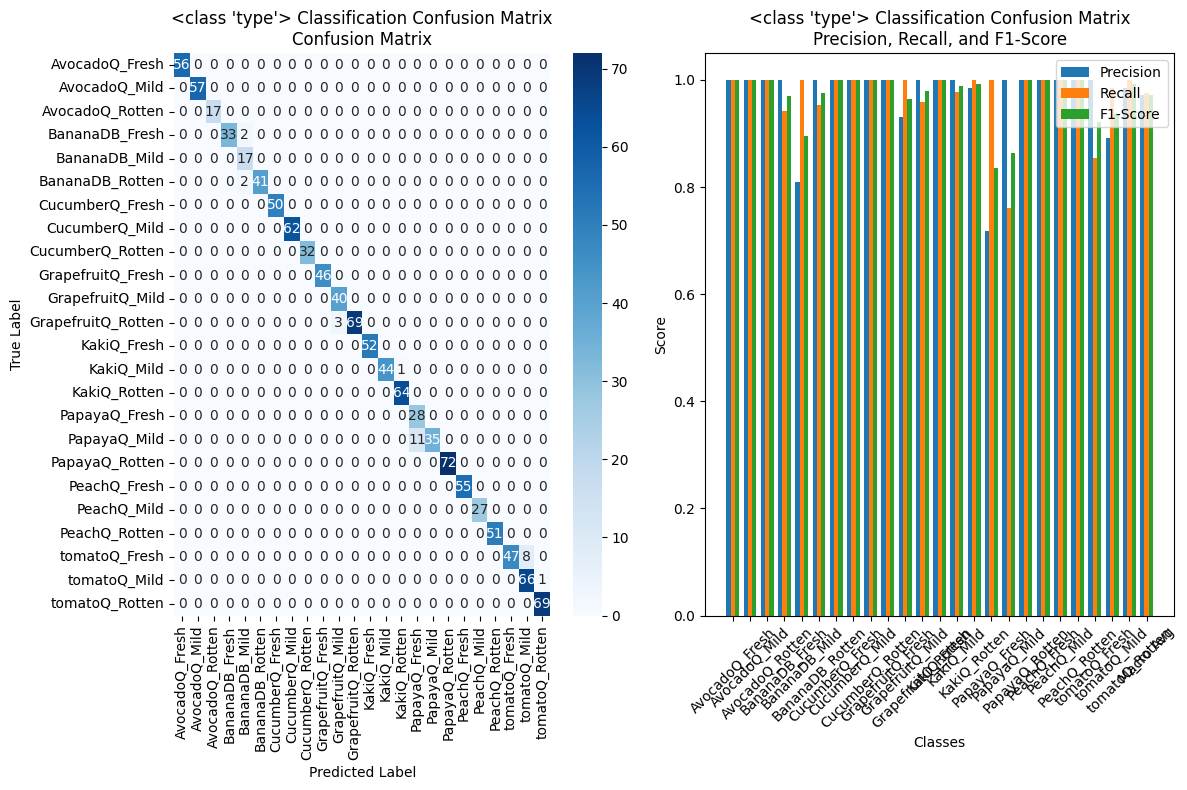


Detailed Classification Report:

Per-Class Metrics:
------------------------------------------------------------

AvocadoQ_Fresh:
Precision: 1.000
Recall: 1.000
F1-Score: 1.000

AvocadoQ_Mild:
Precision: 1.000
Recall: 1.000
F1-Score: 1.000

AvocadoQ_Rotten:
Precision: 1.000
Recall: 1.000
F1-Score: 1.000

BananaDB_Fresh:
Precision: 1.000
Recall: 0.943
F1-Score: 0.971

BananaDB_Mild:
Precision: 0.810
Recall: 1.000
F1-Score: 0.895

BananaDB_Rotten:
Precision: 1.000
Recall: 0.953
F1-Score: 0.976

CucumberQ_Fresh:
Precision: 1.000
Recall: 1.000
F1-Score: 1.000

CucumberQ_Mild:
Precision: 1.000
Recall: 1.000
F1-Score: 1.000

CucumberQ_Rotten:
Precision: 1.000
Recall: 1.000
F1-Score: 1.000

GrapefruitQ_Fresh:
Precision: 1.000
Recall: 1.000
F1-Score: 1.000

GrapefruitQ_Mild:
Precision: 0.930
Recall: 1.000
F1-Score: 0.964

GrapefruitQ_Rotten:
Precision: 1.000
Recall: 0.958
F1-Score: 0.979

KakiQ_Fresh:
Precision: 1.000
Recall: 1.000
F1-Score: 1.000

KakiQ_Mild:
Precision: 1.000
Recall: 0.978
F

In [97]:
evaluate_models(fruit_model, val_data)

In [58]:
# clear session for next train if want to

tf.keras.backend.clear_session(

    free_memory=True

)

In [99]:


def load_and_preprocess_image(image_path, img_size=(224, 224)):

    """

    Load and preprocess an image for model prediction.

    """

    img = tf.keras.preprocessing.image.load_img(

        image_path,

        target_size=img_size

    )

    img_array = tf.keras.preprocessing.image.img_to_array(img)

    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

    img_array = tf.keras.applications.resnet50.preprocess_input(img_array)  # Use ResNet preprocessing

    return img_array



def predict_image(image_path, model, classes):

    """

    Predict the fruit type and its quality based on the given image.



    Args:

        image_path (str): Path to the input image.

        model (tf.keras.Model): Trained model for fruit classification.

        classes (list): List of fruit class names.

    Returns:

        dict: Prediction results including fruit type, quality, and confidence scores.

    """

    # Preprocess image

    img = load_and_preprocess_image(image_path)



    # Predict using the models

    pred = model.predict(img)



    # Get class predictions and confidence scores

    index = np.argmax(pred)



    return {

        'fruit': classes[index],

        'confidence': float(np.max(pred)),

    }


In [105]:
prediction = predict_image(

    image_path='/content/drive/MyDrive/Kepston_bangkit/banana_agak_busuk.jpg',

    model=fruit_model,

    classes=class_names

)



print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
{'fruit': 'BananaDB_Rotten', 'confidence': 0.8021975755691528}


In [28]:
def fine_tune_model(model, base_model, fine_tune_at, learning_rate=1e-5):
    """
    Fine-tune the given model starting from `fine_tune_at` layer.

    Args:
        model (tf.keras.Model): The previously trained model.
        base_model (tf.keras.Model): The base model (e.g., ResNet50).
        fine_tune_at (int): Layer index from which to start unfreezing.
        learning_rate (float): Lower learning rate for fine-tuning.
    
    Returns:
        tf.keras.Model: Fine-tuned model.
    """
    len(base_model.layers)
    
    # Unfreeze the base model starting from `fine_tune_at`
    base_model.trainable = True
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False

    # Recompile the model with a lower learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [30]:
# Define the base model
base_model = tf.keras.applications.ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE, IMG_SIZE, 3)
)

# Load the pre-trained model (if saved earlier)
model_path = '/kaggle/input/fruit_classifier_final/tensorflow2/default/1/fruit_classifier_final.keras'
model = tf.keras.models.load_model(model_path)

# model.load_weights('path_to_saved_weights.h5')  # Optional

# Fine-tune the model
fine_tune_at_layer = 140  # Adjust as needed based on model's layer structure
fine_tuned_model = fine_tune_model(model, base_model, fine_tune_at=fine_tune_at_layer)


In [43]:
# layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  175


In [31]:
fine_tuned_model.summary()

Model: "fruit_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,853,080 (90.99 MB)

 Trainable params: 265,368 (1.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [32]:
def finetune_callbacks():

    return [

        tf.keras.callbacks.EarlyStopping(

            monitor='val_loss',

            patience=3,

            restore_best_weights=True,

            min_delta=0.001

        ),

        tf.keras.callbacks.ModelCheckpoint(

            filepath=os.path.join(log_dir, 'model-{epoch:02d}-{val_accuracy:.2f}.keras'),

            monitor='val_accuracy',

            save_best_only=True,

            mode='max',

        ),

        tf.keras.callbacks.ReduceLROnPlateau(

            monitor='val_loss',

            factor=0.2,

            patience=4,

            min_lr=1e-6

        )

    ]




In [46]:
fine_tune_history = fine_tuned_model.fit(
    train_data,
    validation_data=val_data,
    epochs=15,  # fewer epochs for fine-tuning
    callbacks=finetune_callbacks(),
     class_weight=class_weight_dict
)


Epoch 1/15
580/580 ━━━━━━━━━━━━━━━━━━━━ 39s 67ms/step - accuracy: 0.9613 - loss: 0.1774 - val_accuracy: 0.9491 - val_loss: 0.1932 - learning_rate: 1.0000e-05
Epoch 2/15
580/580 ━━━━━━━━━━━━━━━━━━━━ 39s 67ms/step - accuracy: 0.9582 - loss: 0.1745 - val_accuracy: 0.9525 - val_loss: 0.1899 - learning_rate: 1.0000e-05
Epoch 3/15
580/580 ━━━━━━━━━━━━━━━━━━━━ 38s 65ms/step - accuracy: 0.9701 - loss: 0.1640 - val_accuracy: 0.9439 - val_loss: 0.1904 - learning_rate: 1.0000e-05
Epoch 4/15
580/580 ━━━━━━━━━━━━━━━━━━━━ 37s 65ms/step - accuracy: 0.9635 - loss: 0.1687 - val_accuracy: 0.9421 - val_loss: 0.1913 - learning_rate: 1.0000e-05
Epoch 5/15
580/580 ━━━━━━━━━━━━━━━━━━━━ 38s 66ms/step - accuracy: 0.9722 - loss: 0.1531 - val_accuracy: 0.9387 - val_loss: 0.1986 - learning_rate: 1.0000e-05


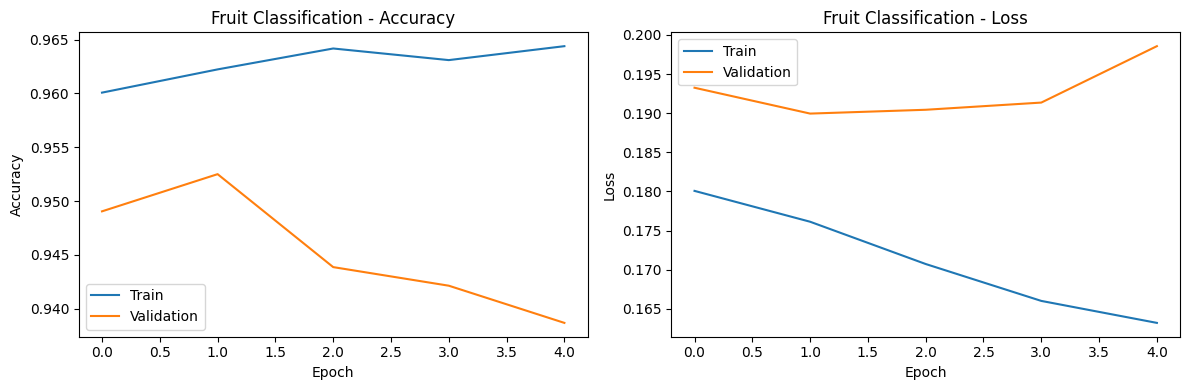

In [47]:
plot_training_history(fine_tune_history, "Fruit Classification")

In [48]:
fine_tuned_model.save('fruit_classifier_final_improved_fine_tuned.keras')